<a href="https://colab.research.google.com/github/JakeCode11/HW2/blob/master/hw2Problem3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importing dependencies
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras


In [0]:
# Preprocessing Data
cifar10 = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

In [26]:
# Setting up 'Overfitting' model
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, kernel_initializer='he_uniform', activation=tf.nn.relu),
    keras.layers.AveragePooling2D(2,2),
    keras.layers.Conv2D(32, kernel_size=3, kernel_initializer='he_uniform', activation=tf.nn.softmax),
    keras.layers.AveragePooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax),
])
 
# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images,
                    train_labels,
                    epochs=epochs,
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 11s 219us/sample - loss: 1.6276 - acc: 0.4058 - val_loss: 1.3968 - val_acc: 0.5036
Epoch 2/20
50000/50000 [==============================] - 11s 212us/sample - loss: 1.3202 - acc: 0.5250 - val_loss: 1.2771 - val_acc: 0.5404
Epoch 3/20
50000/50000 [==============================] - 11s 216us/sample - loss: 1.2189 - acc: 0.5651 - val_loss: 1.2100 - val_acc: 0.5669
Epoch 4/20
50000/50000 [==============================] - 11s 217us/sample - loss: 1.1317 - acc: 0.5988 - val_loss: 1.1559 - val_acc: 0.5866
Epoch 5/20
50000/50000 [==============================] - 11s 213us/sample - loss: 1.0600 - acc: 0.6237 - val_loss: 1.1387 - val_acc: 0.5941
Epoch 6/20
50000/50000 [==============================] - 11s 214us/sample - loss: 1.0018 - acc: 0.6450 - val_loss: 1.0766 - val_acc: 0.6198
Epoch 7/20
50000/50000 [==============================] - 11s 213us/sample - loss: 0.9448 - acc: 0.6659 

In [27]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
history_dict = history.history
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)
print("Test Accuracy:", test_acc)

10000/10000 [==============================] - 1s 116us/sample - loss: 1.1670 - acc: 0.6507
Test Accuracy: 0.6507


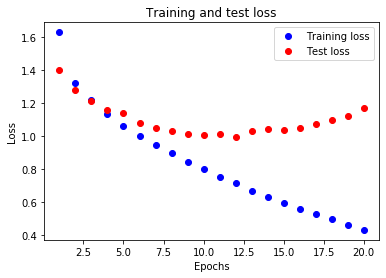

In [28]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

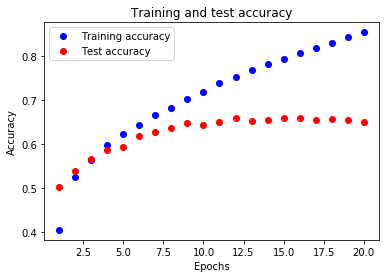

In [29]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [37]:
# Setting up 'Underfitting' model
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, kernel_initializer='he_uniform', activation=tf.nn.relu),
    keras.layers.AveragePooling2D(2,2),
    keras.layers.Conv2D(32, kernel_size=3, kernel_initializer='he_uniform', activation=tf.nn.softmax),
    keras.layers.AveragePooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dropout(0.85),
    keras.layers.Dense(10, activation=tf.nn.softmax),
])
 
# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images,
                    train_labels,
                    epochs=epochs,
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 12s 234us/sample - loss: 1.9598 - acc: 0.2587 - val_loss: 1.5951 - val_acc: 0.4286
Epoch 2/20
50000/50000 [==============================] - 11s 228us/sample - loss: 1.7142 - acc: 0.3617 - val_loss: 1.5027 - val_acc: 0.4601
Epoch 3/20
50000/50000 [==============================] - 11s 228us/sample - loss: 1.6404 - acc: 0.3964 - val_loss: 1.4232 - val_acc: 0.4921
Epoch 4/20
50000/50000 [==============================] - 11s 228us/sample - loss: 1.5889 - acc: 0.4131 - val_loss: 1.3950 - val_acc: 0.5117
Epoch 5/20
50000/50000 [==============================] - 11s 227us/sample - loss: 1.5563 - acc: 0.4315 - val_loss: 1.3421 - val_acc: 0.5151
Epoch 6/20
50000/50000 [==============================] - 11s 228us/sample - loss: 1.5154 - acc: 0.4460 - val_loss: 1.3355 - val_acc: 0.5289
Epoch 7/20
50000/50000 [==============================] - 11s 227us/sample - loss: 1.4880 - acc: 0.4526 

In [38]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
history_dict = history.history
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)
print("Test Accuracy:", test_acc)

10000/10000 [==============================] - 1s 122us/sample - loss: 1.0617 - acc: 0.6217
Test Accuracy: 0.6217


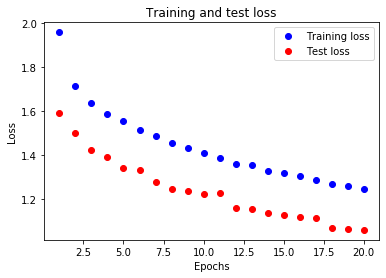

In [39]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

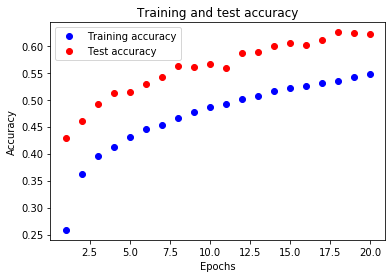

In [40]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [54]:
# Setting up 'Good fit' model
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, kernel_initializer='he_uniform', activation=tf.nn.relu),
    keras.layers.Conv2D(32, kernel_size=3, kernel_initializer='he_uniform', activation=tf.nn.relu),
    keras.layers.AveragePooling2D(2,2),
    keras.layers.Conv2D(32, kernel_size=3, kernel_initializer='he_uniform', activation=tf.nn.softmax),
    keras.layers.Conv2D(32, kernel_size=3, kernel_initializer='he_uniform', activation=tf.nn.softmax),
    keras.layers.AveragePooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax),
])
 
# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images,
                    train_labels,
                    epochs=epochs,
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 16s 322us/sample - loss: 1.9582 - acc: 0.2428 - val_loss: 1.6782 - val_acc: 0.3683
Epoch 2/20
50000/50000 [==============================] - 16s 311us/sample - loss: 1.5262 - acc: 0.4356 - val_loss: 1.4077 - val_acc: 0.4832
Epoch 3/20
50000/50000 [==============================] - 16s 311us/sample - loss: 1.3624 - acc: 0.5021 - val_loss: 1.3113 - val_acc: 0.5207
Epoch 4/20
50000/50000 [==============================] - 16s 311us/sample - loss: 1.2730 - acc: 0.5369 - val_loss: 1.2347 - val_acc: 0.5479
Epoch 5/20
50000/50000 [==============================] - 16s 311us/sample - loss: 1.2015 - acc: 0.5626 - val_loss: 1.1720 - val_acc: 0.5778
Epoch 6/20
50000/50000 [==============================] - 16s 310us/sample - loss: 1.1372 - acc: 0.5902 - val_loss: 1.1317 - val_acc: 0.5944
Epoch 7/20
50000/50000 [==============================] - 16s 311us/sample - loss: 1.0798 - acc: 0.6098 

In [55]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
history_dict = history.history
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)
print("Test Accuracy:", test_acc)

10000/10000 [==============================] - 1s 148us/sample - loss: 0.8182 - acc: 0.7160
Test Accuracy: 0.716


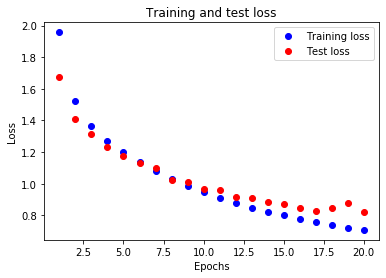

In [56]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

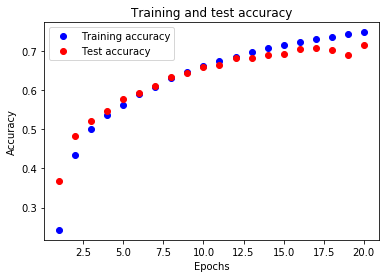

In [57]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()